# Research questions:

1. What is the relationship between how many post-secondary education centers are in a state and how religious that state is?
1. What is the relationship between political affiliation and post-secondary education achievement in a state?
1. What is the relationship between the number of congregations in a state and how many people have achieved a Bachelors degree or higher?
1. What is the relationship between the number of universities in a state and how many people have achieved a Bachelors degree or higher?

## Data sources:
- https://data.world/dhs/colleges-and-universities
- https://data.world/wendyhe/how-religious-is-your-state (original source: http://www.pewforum.org/2015/11/03/u-s-public-becoming-less-religious/, https://www.pewresearch.org/fact-tank/2016/02/29/how-religious-is-your-state/?state=alaska)
- https://worldpopulationreview.com/state-rankings/educational-attainment-by-state (original source: https://www.census.gov/data/tables/2018/demo/education-attainment/cps-detailed-tables.html)

Data will be analyzed by state. I'll look at the following factors:
- the number of colleges and universities a state has per 1000 people
- the number of congregations a state has per 1000 people
- percent of people in a state that have a Bachelors degree or higher
- percent of people in a state that have a high school diploma
- percent of people in a state who affiliate with the Republican party
- percent of people in a state who affiliate with the Democrat party
- percent of people in a state who affiliate with neither party
- whether or not the state voted Democrat or Republican in the 2020 Presidential Election
- whether or not the state's governor is Democrat or Republican

The following factors were used from a Pew Research study to determine how religious a state is:
- religion adherence level
- percent of people in a state who say that religion is very important to them

My hypotheses are:
- the more formally educated people there are in the state, the less people there are that adhere to a religion or think it is important to them
- the more congregations there are in a state, the more religious the state is and the less educated
- the more Democrat leaning people there are in the state, the less people there are that adhere to a religion or think it is important to them, and the more formally educated people are in that state
- the more universities in a state, the more people there will be with Bachelors degrees or higher


## Importing Data

In [2]:
import pandas as pd
import numpy as np

# Colleges and university data
coluniv_df = pd.read_csv('Colleges_and_Universities.csv')
coluniv_df = coluniv_df.drop(columns=['X', 'Y', 'FID', 'IPEDSID', 'ADDRESS', 'ADDRESS2', 'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'SOURCE', 'SOURCE_DAT', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STFIPS', 'COFIPS', 'SECTOR', 'LEVEL_', 'HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'ALIAS'])

# Pew Research Religious Membership study
rel_df = pd.read_csv('US-Religion-Census-Religious-Congregations-and-Membership-Study-2010.csv')

# Education Attainment data
education_df = pd.read_csv('education-attainment.csv') # this doesn't have DC

## Cleaning Data

In [3]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}


# Calculate total of each type of school for each state
def total_schools(state, new_df):

    business = 0
    computer_training = 0
    college = 0
    junior_college = 0
    cosmetology = 0
    educ_support = 0
    fine_arts = 0
    flight_training = 0
    other_technical = 0

    for index, row in coluniv_df.iterrows():
        row_state = row['STATE']

        if row_state == state:
            if row['NAICS_DESC'] == 'Business and Secretarial Schools':
                business += 1
            elif row['NAICS_DESC'] == 'Colleges, Universities, and Professional Schools':
                college += 1
            elif row['NAICS_DESC'] == 'Computer Training':
                computer_training += 1
            elif row['NAICS_DESC'] == 'Cosmetology and Barber Schools':
                cosmetology += 1
            elif row['NAICS_DESC'] == 'Educational Support Servies/Closed':
                educ_support += 1
            elif row['NAICS_DESC'] == 'Fine Arts Schools':
                fine_arts += 1
            elif row['NAICS_DESC'] == 'Flight Training':
                flight_training += 1
            elif row['NAICS_DESC'] == 'Junior Colleges':
                junior_college += 1
            elif row['NAICS_DESC'] == 'Other Technical and Trade Schools':
                other_technical += 1
                
    data = {'State': us_state_abbrev[state], 'Business and Secretarial Schools': business,
            'Colleges, Universities, and Professional Schools': college,
            'Computer Training': computer_training,
            'Cosmetology and Barber Schools': cosmetology,
            'Educational Support Servies/Closed': educ_support,
            'Fine Arts Schools': fine_arts,
            'Flight Training': flight_training,
            'Junior Colleges': junior_college,
            'Other Technical and Trade Schools': other_technical}
                
    new_df = new_df.append(data, ignore_index = True)
    return new_df
                
    
# Create a data frame with school summary information
school_summary_df = pd.DataFrame()

for state in states:
    school_summary_df = total_schools(state, school_summary_df)

In [4]:
# Estimate the population based on the total number of religious adherents and the rate of adherence per 1000 population from the religious dataset
rel_df['Estimated Population'] = rel_df['Total Number of Adherents']/(rel_df['Rates of Adherence per 1,000 Population']/1000)

# Clean up state name
rel_df = rel_df.rename(columns={'State Name': 'State'})
coluniv_df = coluniv_df.rename(columns={'STATE': 'State'})

In [5]:
# Merge datasets together

all_df = rel_df.merge(education_df, on = ['State'])

all_df = all_df.merge(school_summary_df, on = ['State'])

## Data Visualizations

In [6]:
# Sort by the total number of congregations for visualization
df2 = all_df.sort_values('Total Number of Congregations')

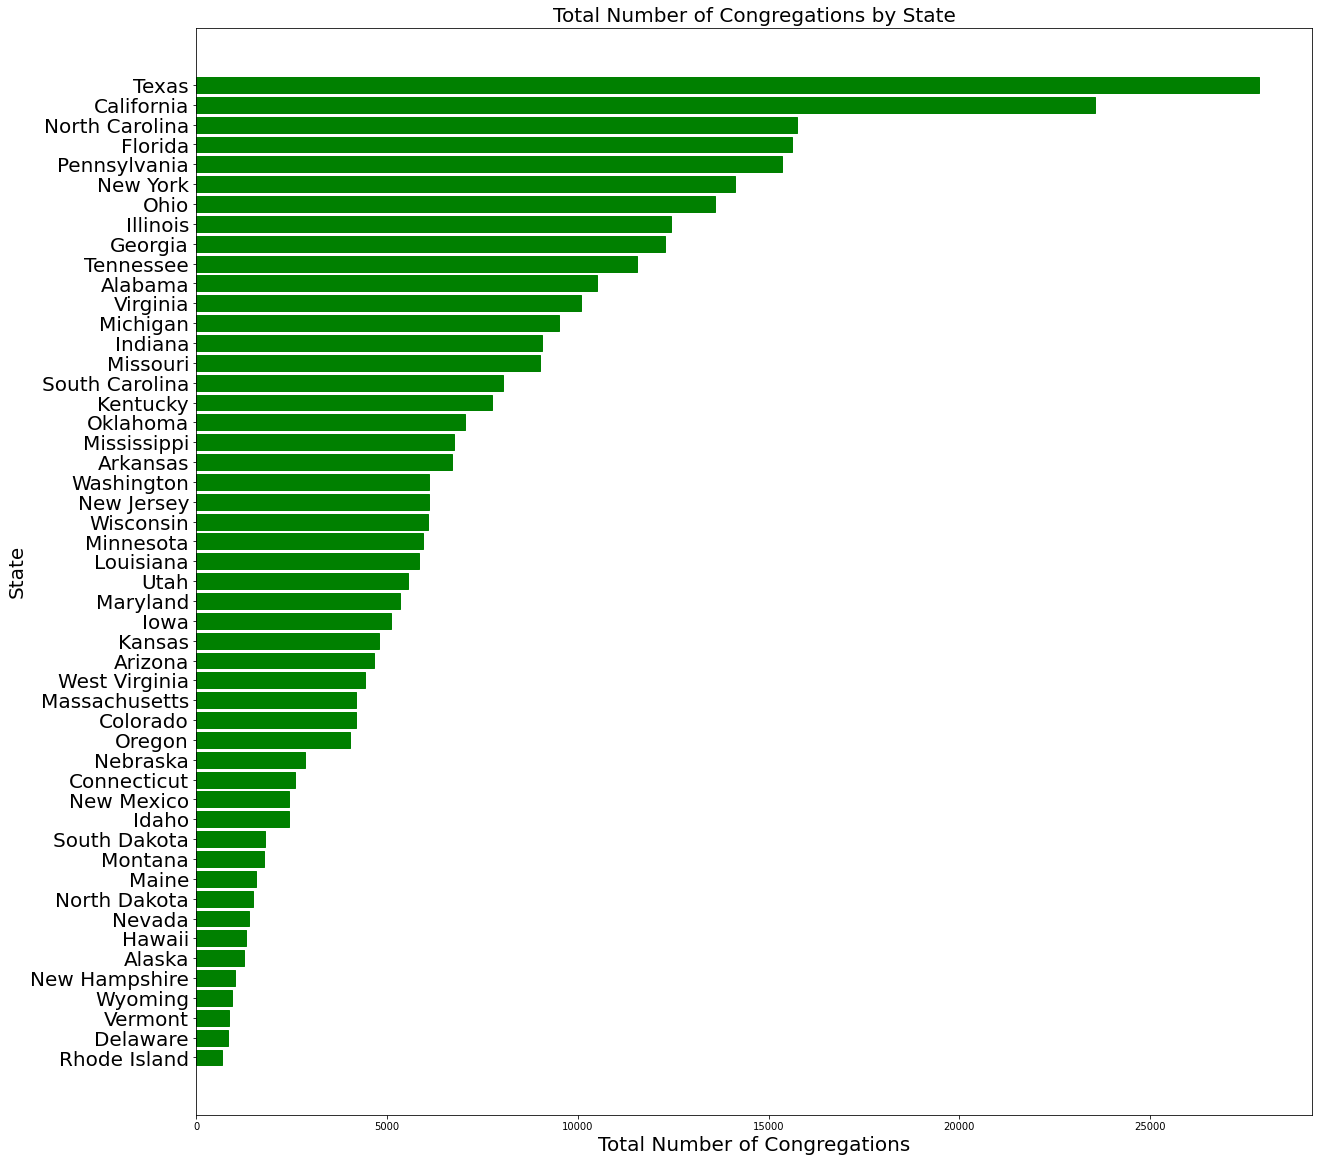

In [8]:
import matplotlib.pyplot as plt

# Plot total number of congregations by state

frequencies = df2['Total Number of Congregations']
x_labels = df2['State']

plt.figure(figsize=(20, 20))

plt.barh(range(len(frequencies)), frequencies, color="green", 
     edgecolor='green', tick_label=x_labels)
plt.yticks(fontsize=20)
plt.ylabel('State', fontsize=20)
plt.xlabel('Total Number of Congregations', fontsize=20)
plt.title('Total Number of Congregations by State', fontsize=20)
plt.show()

# sometimes I have to run this cell 2 times for the plot to load

Texas the highest number of congregations by state and Rhode Island has the least. This plot doesn't take into account population or how religious the state is.

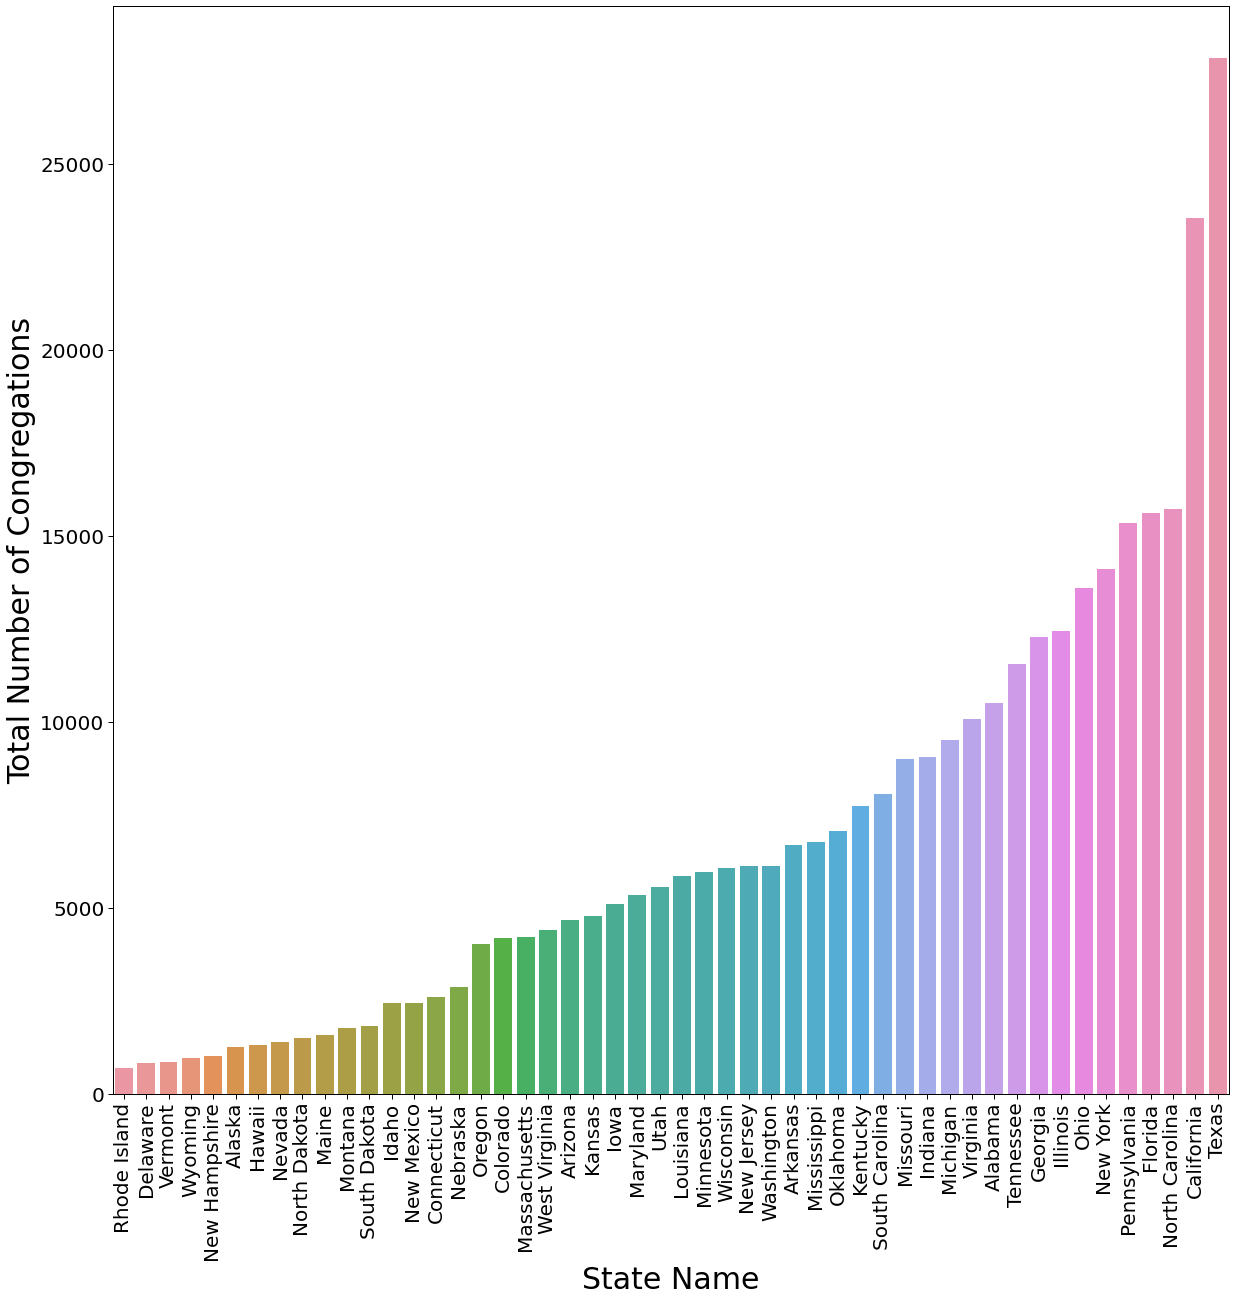

In [9]:
# Same information plotted in a horizontal bar chart with pretty colors

import seaborn as sns

sns.set_context('paper')

plt.figure(figsize=(20, 20))

b = sns.barplot(x="State", y = "Total Number of Congregations", data = df2)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
b.set_xlabel("State Name", fontsize=30)
b.set_ylabel("Total Number of Congregations", fontsize=30)

plt.show()

In [11]:
# Calculate the number of congregations per 1000 people

all_df['Congregations Per 1000 People'] = (all_df['Total Number of Congregations']/ all_df['Estimated Population']) * 1000

# Calculate the number of Colleges, Universities, and Professional Schools per 1000 people

all_df['Universities per 1000 People'] = ((all_df['Colleges, Universities, and Professional Schools'] + all_df['Junior Colleges'] + all_df['Fine Arts Schools'] + all_df['Other Technical and Trade Schools'])/ all_df['Estimated Population']) * 1000

# Sort by congregations per 1000 people
df3 = all_df.sort_values('Congregations Per 1000 People')

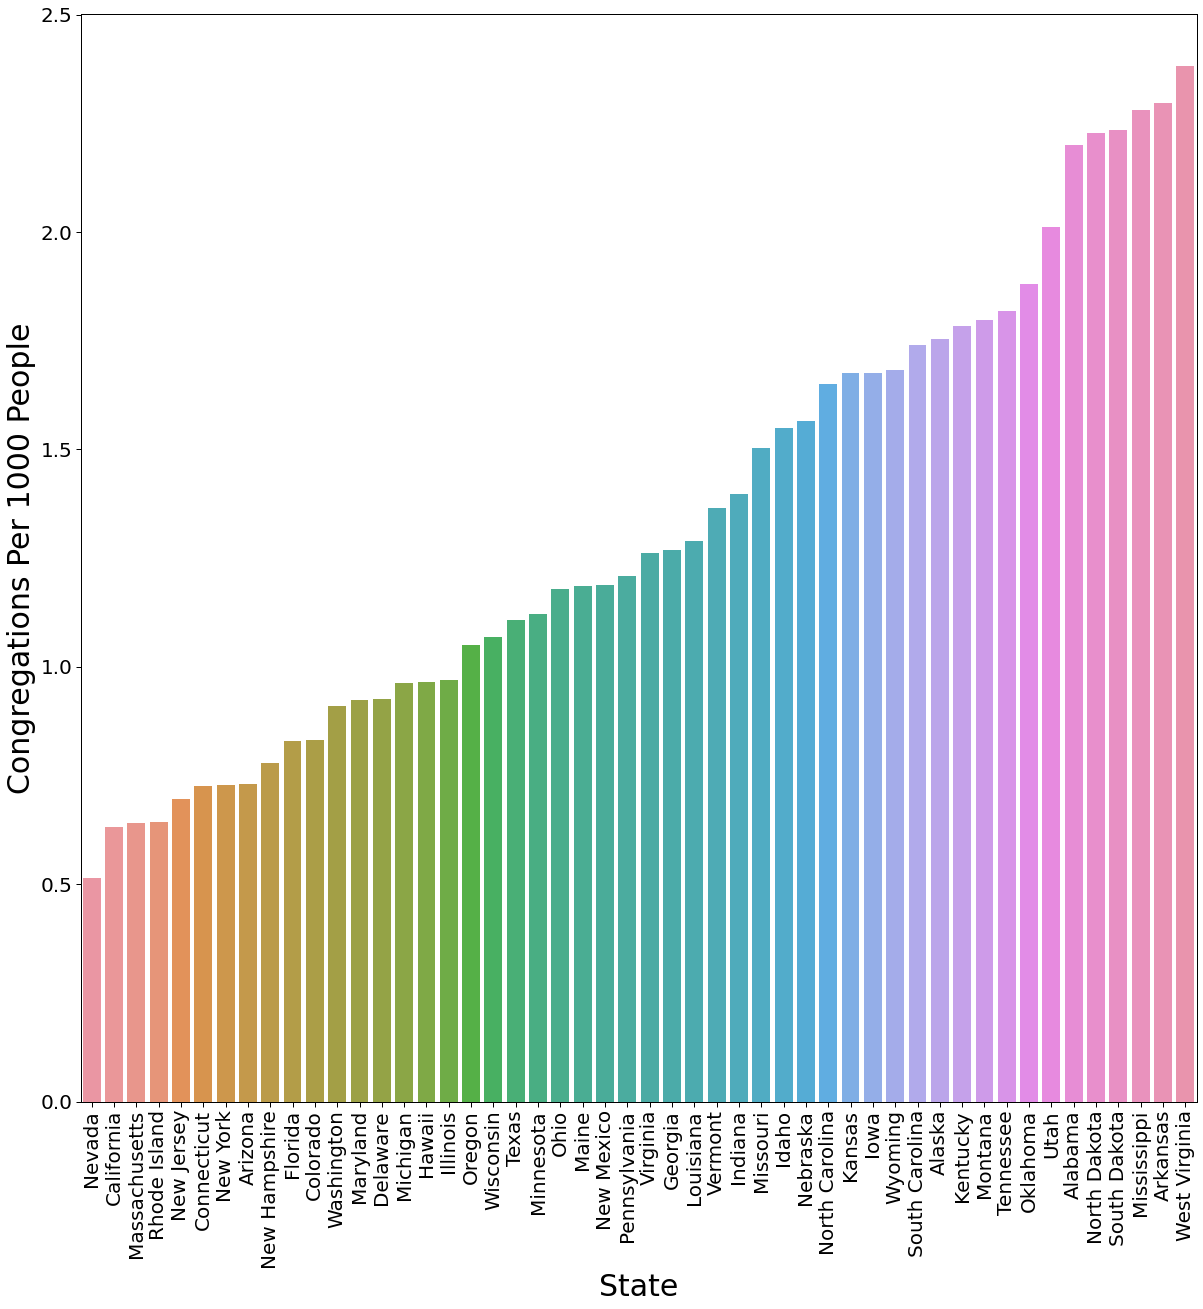

In [12]:
# Plot the number of congregations per 1000 people by state

import seaborn as sns

sns.set_context('paper')

plt.figure(figsize=(20, 20))

b = sns.barplot(x="State", y = "Congregations Per 1000 People", data = df3)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
b.set_xlabel("State", fontsize=30)
b.set_ylabel("Congregations Per 1000 People", fontsize=30)

plt.show()

Now that population has been taken into account, West Virginia has the most congregations per person, and Nevada has the least.

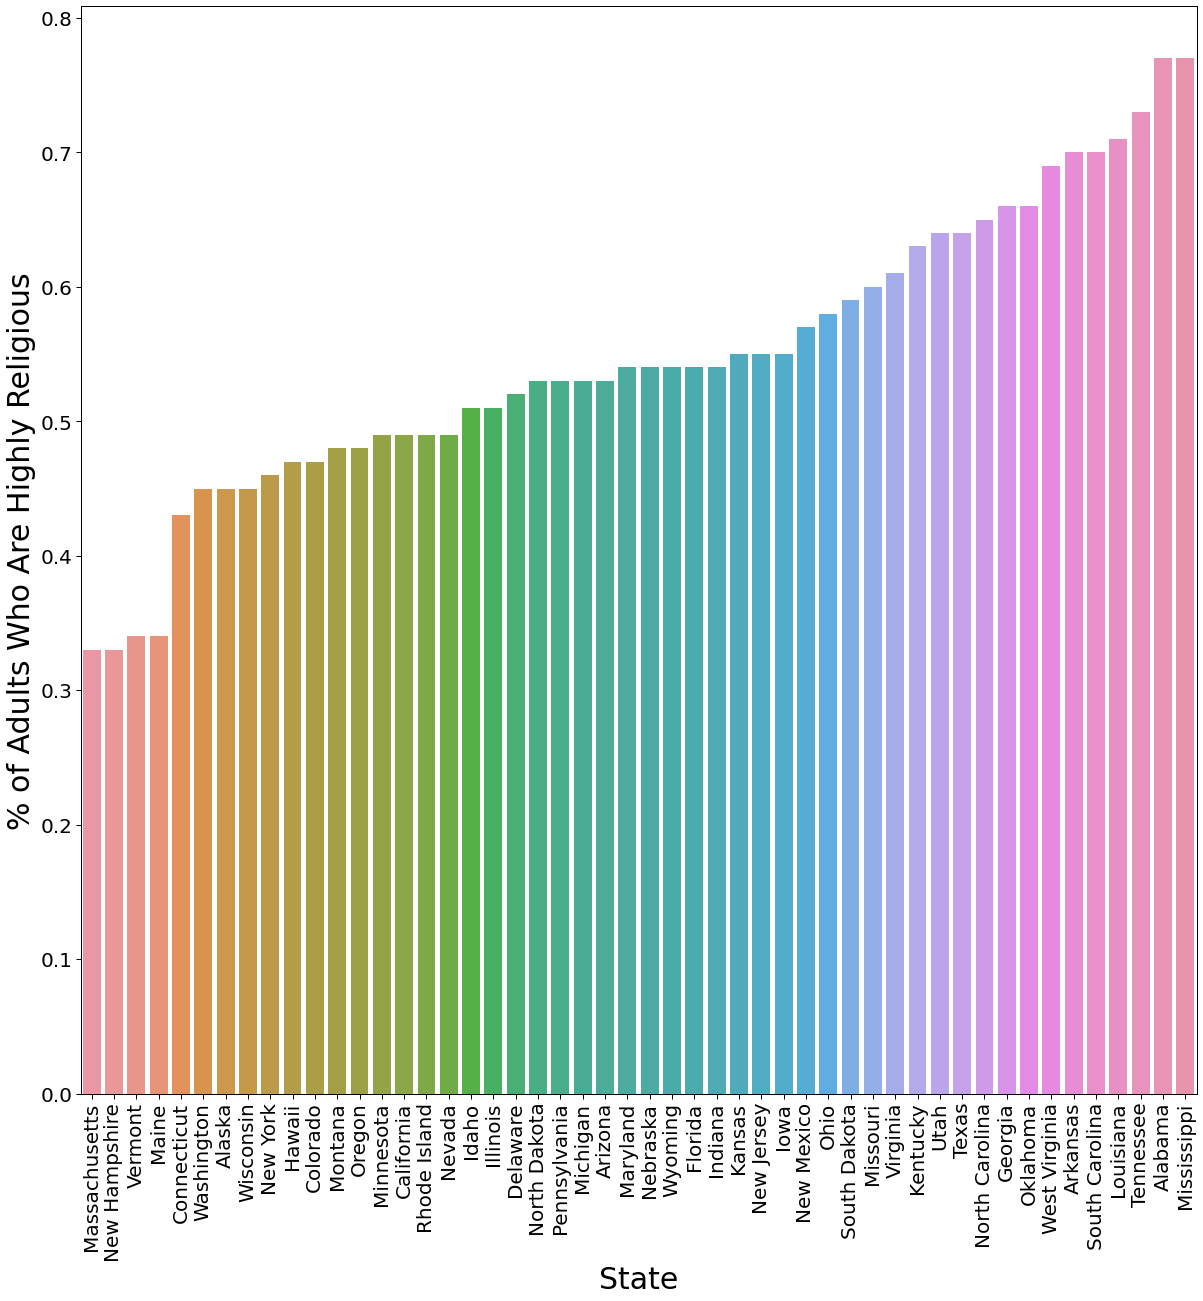

In [13]:
# Sort by % of adults who are highly religious instead

df3 = df2.sort_values('% of Adults Who Are Highly Religious')

# Plot the % of adults who are highly religious by state
import seaborn as sns

sns.set_context('paper')

plt.figure(figsize=(20, 20))

b = sns.barplot(x="State", y = "% of Adults Who Are Highly Religious", data = df3)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
b.set_xlabel("State", fontsize=30)
b.set_ylabel("% of Adults Who Are Highly Religious", fontsize=30)

plt.show()

Mississippi has the highest percentage of adults who are highly religious and Massachusetts has the least.

In [15]:
# Cut the rates of religious adherence per 1000 people into 3 groups based on quartiles - low, medium, and high

all_df['Religious Adherence Level'] = pd.qcut(all_df['Rates of Adherence per 1,000 Population'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])

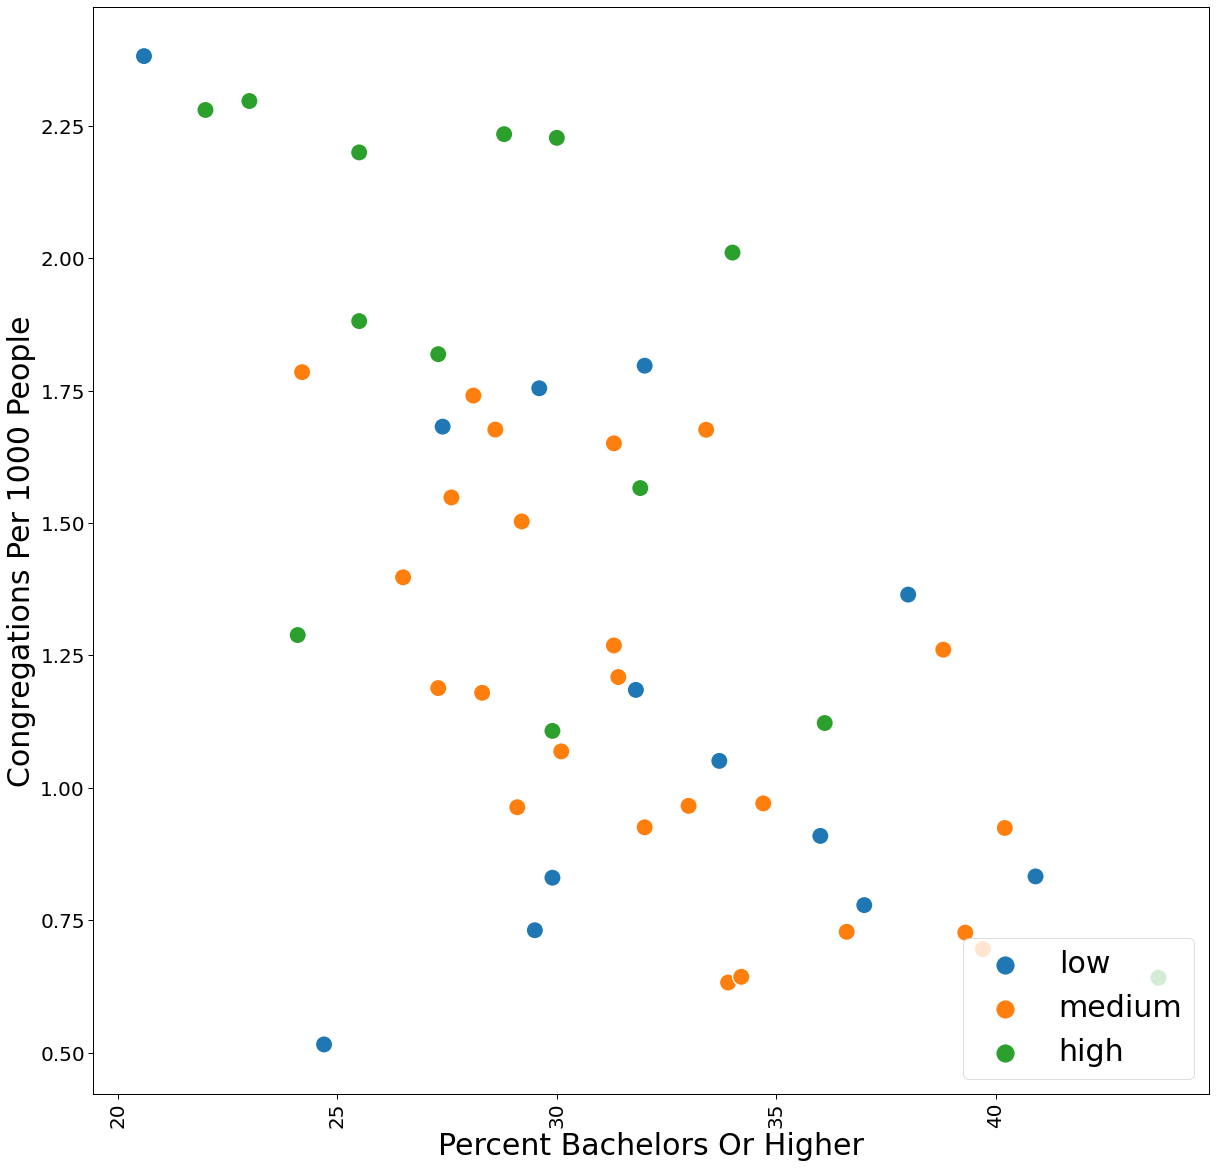

In [16]:
# Plot the percentage of people who have a Bachelors or higher vs. number of congregations per 1000 people, each state's color is based on their religious adherence level (high, middle, low)

import seaborn as sns

def scatterplot(x, y, x_label, y_label, hue):

    sns.set_context('paper')

    plt.figure(figsize=(20, 20))

    b = sns.scatterplot(x=x, y =y, data = all_df, hue=hue, s = 300)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    lgnd = plt.legend(fontsize=30, title_fontsize=30, loc='lower right')
    lgnd.legendHandles[0]._sizes = [300]
    lgnd.legendHandles[1]._sizes = [300]
    lgnd.legendHandles[2]._sizes = [300]

    b.set_xlabel(x_label, fontsize=30)
    b.set_ylabel(y_label, fontsize=30)

    plt.show()
  
hue = "Religious Adherence Level"
x = 'Percent Bachelors Or Higher'
y = 'Congregations Per 1000 People'
scatterplot(all_df[x], all_df[y], x, y, hue)

Visually, there appears to be a negative linear trend, states with more congregations per 1000 people generally have a smaller percentage of people who have a Bachelors degree or higher.

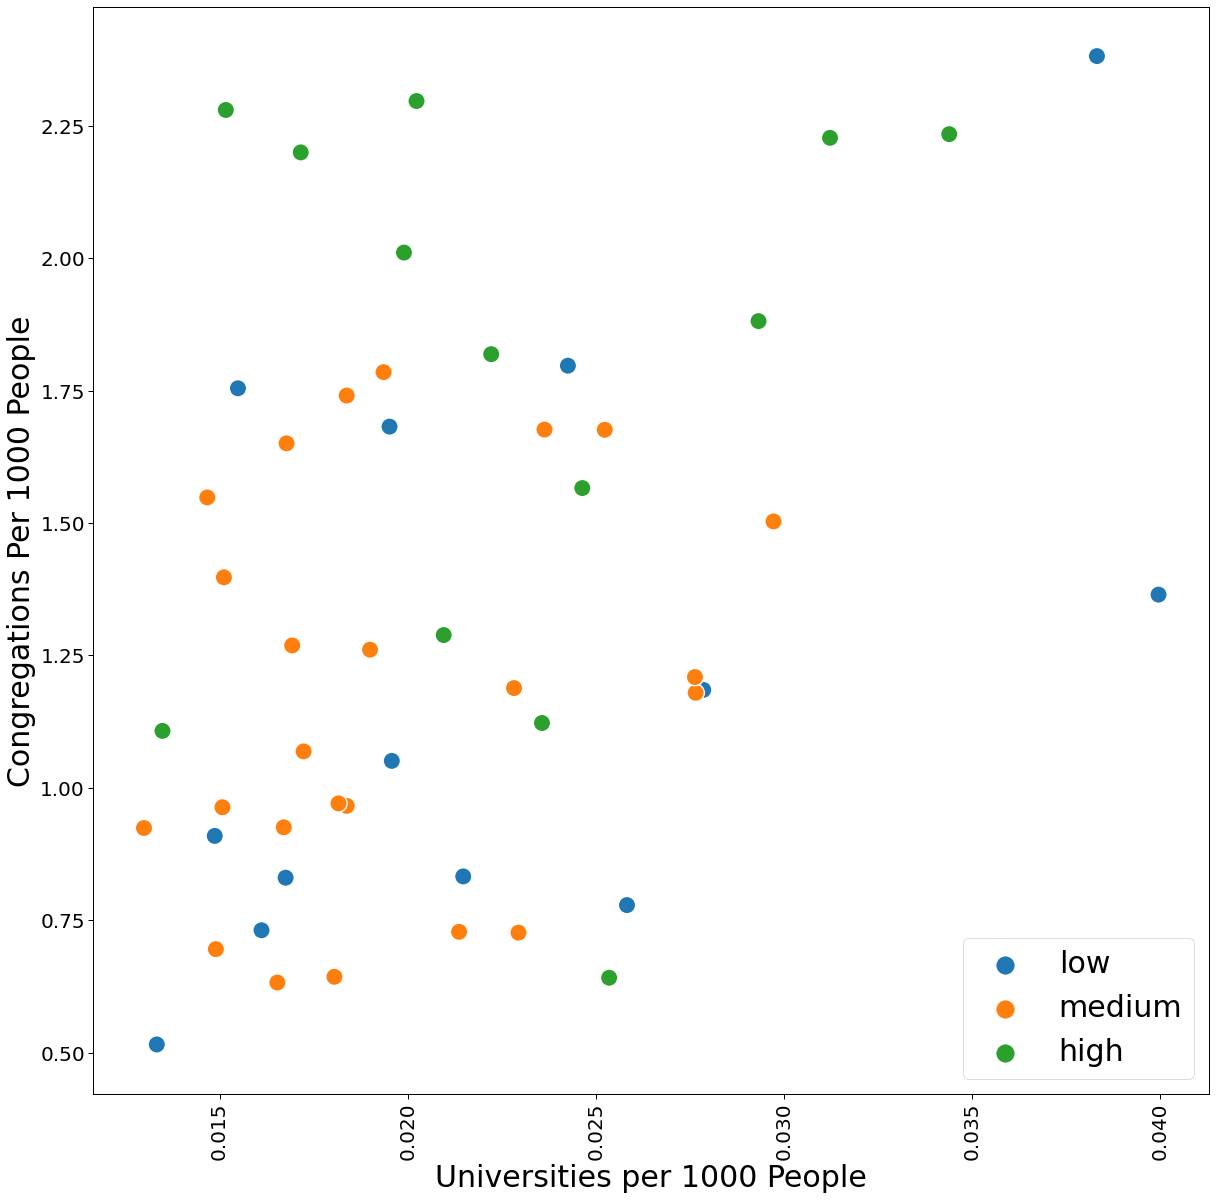

In [17]:
# Plot the number of congregations per 1000 people vs. number of universities per 1000 people, each state's color is based on their religious adherence level (high, middle, low)

hue = "Religious Adherence Level"
x = 'Universities per 1000 People'
y = 'Congregations Per 1000 People'
scatterplot(all_df[x], all_df[y], x, y, hue)

Visually, I don't see much of a pattern. Most of the states are in the bottom left of the graph with smaller number of congregations and less universities. More states with high religious adherence tend to have a higher number of congregations per 1000 people than do states with medium or low religious adherence.

In [17]:
# Clean up % of adults who say religion is very important in their lives to decimal number
all_df['% of Adults Who Say Religion Is Very Important In Their Lives'] = all_df['% of Adults Who Say Religion Is Very Important In Their Lives']/100

# Cut the % of adults who say religion is very important in their lives into 3 groups based on quartiles - low, medium, and high
all_df['Religion Is Important Level'] = pd.qcut(all_df['% of Adults Who Say Religion Is Very Important In Their Lives'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])

## Model #1
I created a KNN classifier model with the following:

### Features
1. Percent high school or higher
1. Percent Bachelors or higher
1. Congregations per 1000 people
1. Universities per 1000 people


### Target
1. Religion is important level

In [18]:
# Religion is important level model
from sklearn.model_selection import train_test_split

X = all_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools'], axis=1)
y = all_df['Religion Is Important Level']

# 20% test, 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

X_train.shape

(40, 4)

In [20]:
knn.score(X_test, y_test)

0.5

I tried various numbers of neighbors, accuracy changes each time I run it. Sometimes it's 60%, sometimes 30%, 20% or 50%). I think it's because there are only 50 states, 40 are train and 10 test. It'll depend on which ones are chosen. Would be better if there were more samples.
Accuracy is only 30%. Since the target only has 3 levels, you could do better by just randomly guessing (33%).

## Model #2
I created a KNN classifier model with the following:

### Features
1. Percent high school or higher
1. Percent Bachelors or higher
1. Congregations per 1000 people
1. Universities per 1000 people


### Target
1. Religion adherence level

In [21]:
# Religious Adherence Level model
from sklearn.model_selection import train_test_split

X = all_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools'], axis=1)
y = all_df['Religious Adherence Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

X_train.shape

(40, 4)

In [23]:
knn.score(X_test, y_test)

0.1

Accuracy is really low, only 10%.

## Model #3
I created a Multinomial Naive-Bayes model with the following:

### Features
1. Percent high school or higher
1. Percent Bachelors or higher
1. Congregations per 1000 people
1. Universities per 1000 people


### Target
1. Religion adherence level

In [24]:
# Try Naive Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

X = all_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools'], axis=1)
y = all_df['Religious Adherence Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

model = MultinomialNB() # MultinomialNB()
model = model.fit(X_train, y_train)

# training accuracy
model.score(X_train, y_train)

0.4864864864864865

Training accuracy is 48.6%.

In [25]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
accuracy

46.15384615384615

Predictions on the testing data have an accuracy of 46.15% which better than using the KNN classifier model.

## Model #3
I created a Multinomial Naive-Bayes model with the following:

### Features
1. Percent high school or higher
1. Percent Bachelors or higher
1. Congregations per 1000 people
1. Universities per 1000 people


### Target
1. Religion is important level

In [26]:
# Try it again
# Try Naive Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

X = all_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools'], axis=1)
y = all_df['Religion Is Important Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

model = MultinomialNB() # MultinomialNB()
model = model.fit(X_train, y_train)

# training accuracy
model.score(X_train, y_train)

0.5675675675675675

Training accuracy is 56.76%.

In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
accuracy

53.84615384615385

Predictions on the testing data have an accuracy of 53.85% which is similar to using the KNN classifier model.

# Adding more data to include more features in the model

In [28]:
# Let's add in some political data
political_df = pd.read_csv('political-party-affiliation-by-state.csv')

## Datasources:
 
- https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states
- https://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/

In [30]:
# Merge the political dataframe into all_df
all_political_df = all_df.merge(political_df, on = ['State'])

In [59]:
from sklearn import preprocessing

# Encoding Democrat and Republican to 0 or 1
def convert(data):
    number = preprocessing.LabelEncoder()
    data['2020 Presidential Election'] = number.fit_transform(data['2020 Presidential Election'])
    data['Governor'] = number.fit_transform(data['Governor'])
    return data

## Model #4
I created a KNN classifier model with the following:

### Features
1. Percent high school or higher
1. Percent Bachelors or higher
1. Congregations per 1000 people
1. Universities per 1000 people
1. Percent leaning Republican
1. No political lean
1. Percent leaning Democrat
1. 2020 Presidential Election - state either voted Democrat or Republican
1. State governor - Democrat or Republican


### Target
1. Religion is important level

In [39]:
# Predicting religion is important level
from sklearn.metrics import accuracy_score

X = all_political_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools', 'Sample Size'], axis=1)
y = all_political_df['Religion Is Important Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)
X_train=convert(X_train)
X_test=convert(X_test)

knn = KNeighborsClassifier(n_neighbors = 2) # 6 neighbors gives pretty good results 80% accuracy
knn.fit(X_train, y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


KNeighborsClassifier(n_neighbors=2)

In [40]:
knn.score(X_test, y_test)

0.23076923076923078

Knn score is 23%, which is pretty low.

## Model #5
I created a KNN classifier model with the following:

### Features
1. Percent high school or higher
1. Percent Bachelors or higher
1. Congregations per 1000 people
1. Universities per 1000 people
1. Percent leaning Republican
1. No political lean
1. Percent leaning Democrat
1. 2020 Presidential Election - state either voted Democrat or Republican
1. State governor - Democrat or Republican


### Target
1. Religious Adherence level

In [42]:
# Predicting religion adherence level
from sklearn.metrics import accuracy_score

X = all_political_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools', 'Sample Size'], axis=1)
y = all_political_df['Religious Adherence Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)
X_train=convert(X_train)
X_test=convert(X_test)

knn = KNeighborsClassifier(n_neighbors = 2) # 6 neighbors gives pretty good results 80% accuracy
knn.fit(X_train, y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


KNeighborsClassifier(n_neighbors=2)

In [43]:
knn.score(X_test, y_test)

0.6153846153846154

Knn score for predicting religious adherence level is 61.5%. The model is much better at predicting religious adherence level versus predicting if religion is important or not with the same factors.

In [55]:
# Try splitting percent bachelors into H, M, L
# same with congregations and universities

levels_for_all_df = all_political_df.copy(deep=True)
levels_for_all_df['Bachelors or Higher Level'] = pd.qcut(all_political_df['Percent Bachelors Or Higher'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])
levels_for_all_df['Congregations Level'] = pd.qcut(all_political_df['Congregations Per 1000 People'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])
levels_for_all_df['Universities Level'] = pd.qcut(all_political_df['Universities per 1000 People'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])
levels_for_all_df['Republican Level'] = pd.qcut(all_political_df['Republican/lean Rep.'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])
levels_for_all_df['No Lean Level'] = pd.qcut(all_political_df['No lean'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])
levels_for_all_df['Democrat Level'] = pd.qcut(all_political_df['Democrat/lean Dem.'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])

## Model #6
I created a KNN classifier model with the following:

### Features
(All encoded to high, middle, low for numeric, and 0/1 for Democrat and Republican)
1. Percent high school or higher
1. Percent Bachelors or higher
1. Congregations per 1000 people
1. Universities per 1000 people
1. Percent leaning Republican
1. No political lean
1. Percent leaning Democrat
1. 2020 Presidential Election - state either voted Democrat or Republican
1. State governor - Democrat or Republican


### Target
1. Religion is important level

In [60]:
def convert(data):
    number = preprocessing.LabelEncoder()
    data.loc[:, '2020 Presidential Election'] = number.fit_transform(data.loc[:, '2020 Presidential Election'])
    data.loc[:, 'Governor'] = number.fit_transform(data.loc[:, 'Governor'])
    data.loc[:, 'Bachelors or Higher Level'] = number.fit_transform(data.loc[:, 'Bachelors or Higher Level'])
    data.loc[:, 'Congregations Level'] = number.fit_transform(data.loc[:, 'Congregations Level'])
    data.loc[:, 'Universities Level'] = number.fit_transform(data.loc[:, 'Universities Level'])
    data.loc[:, 'Democrat Level'] = number.fit_transform(data.loc[:, 'Democrat Level'])
    data.loc[:, 'No Lean Level'] = number.fit_transform(data.loc[:, 'No Lean Level'])
    data.loc[:, 'Republican Level'] = number.fit_transform(data.loc[:, 'Republican Level'])
    return data

# Predicting religion is important level
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

X = levels_for_all_df.drop(['Republican/lean Rep.', 'No lean', 'Democrat/lean Dem.', 'Percent High School Or Higher', 'Percent Bachelors Or Higher', 'Congregations Per 1000 People', 'Universities per 1000 People', '% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools', 'Sample Size'], axis=1)
y = levels_for_all_df['Religion Is Important Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)
X_train=convert(X_train)
X_test=convert(X_test)

knn = KNeighborsClassifier(n_neighbors = 2) # 6 neighbors gives pretty good results 80% accuracy
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

/home/kira/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [61]:
knn.score(X_test, y_test)

0.38461538461538464

Knn score is 38.46% for the prediction of the religion is important level. Since there are 3 levels, the score is slightly better than random selection.

# Linear Regression #1 - Percent of Democratic Leaning People vs. Percent of Bachelors or Higher Achieved

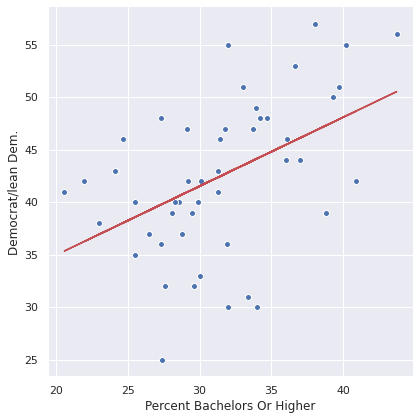

<Figure size 1440x1440 with 0 Axes>

0.22163859000266473

In [73]:
# Percent of democrats or dem. leaning in a state vs. percent of bachelors or higher

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

hue = 'Religion Is Important Level'
x = 'Percent Bachelors Or Higher'
y = 'Democrat/lean Dem.'

X = all_political_df[x].values[:,np.newaxis]
# target data is array of shape (n,) 
Y = all_political_df[y].values

model2 = LinearRegression()
model2.fit(X, Y)

g = sns.FacetGrid(all_political_df, height = 6)
sns.set(rc={'figure.figsize':(30, 30)})
g = g.map(plt.scatter, "Percent Bachelors Or Higher", "Democrat/lean Dem.", edgecolor="w")
plt.plot(X, model2.predict(X), color='r')
plt.figure(figsize=(20, 20))
plt.show()

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

R^2 is 0.22. R^2 is a goodness of fit measure for linear regression. This means that 22% of the variance in the percent bachelors or higher variable is explained by the percent Democratic leaning variable. If R^2 was 1, then that would mean 100% of the variance in the percent bachelors or higher variable is explained by the percent Democratic leaning variable.

The slope of the linear regression is positive which indicates that there is a positive trend such that the higher percent of bachelors or higher achieved in a state, the more people there are that are Democratic leaning.

# Linear Regression #2 - Percent of Republican Leaning People vs. Percent of Bachelors or Higher Achieved

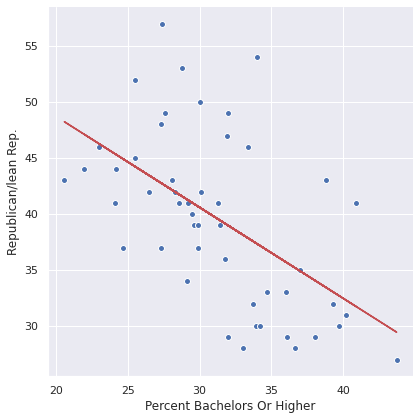

0.30816780896553764

In [75]:
# Percent of republican or rep. leaning in a state vs. percent of bachelors or higher
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

hue = 'Religion Is Important Level'
x = 'Percent Bachelors Or Higher'
y = 'Republican/lean Rep.'

X = all_political_df[x].values[:,np.newaxis]
# target data is array of shape (n,) 
Y = all_political_df[y].values

model2 = LinearRegression()
model2.fit(X, Y)

g = sns.FacetGrid(all_political_df, height = 6)
sns.set(rc={'figure.figsize':(30, 30)})
g = g.map(plt.scatter, "Percent Bachelors Or Higher", "Republican/lean Rep.", edgecolor="w")
plt.plot(X, model2.predict(X), color='r')
plt.show()

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

R^2 is 0.308. R^2 is a goodness of fit measure for linear regression. This means that 30.8% of the variance in the percent bachelors or higher variable is explained by the percent Republican leaning variable. If R^2 was 1, then that would mean 100% of the variance in the percent bachelors or higher variable is explained by the percent Republican leaning variable.

The slope of the linear regression is negative which indicates that there is a negative trend such that the lower percent of bachelors or higher achieved in a state, the more people there are that are Republican leaning.

# Linear Regression #3 - Percent of No Leaning People vs. Percent of Bachelors or Higher Achieved

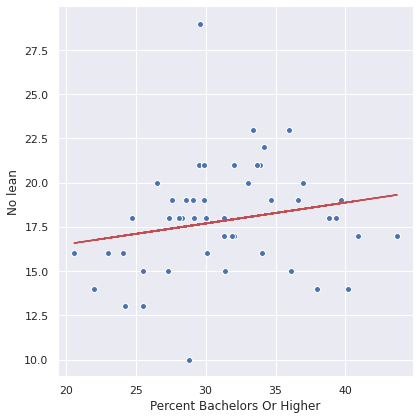

0.03856530031156313

In [78]:
# Percent of no lean in a state vs. percent of bachelors or higher

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

hue = 'Religion Is Important Level'
x = 'Percent Bachelors Or Higher'
y = 'No lean'

X = all_political_df[x].values[:,np.newaxis]
# target data is array of shape (n,) 
Y = all_political_df[y].values

model2 = LinearRegression()
model2.fit(X, Y)

g = sns.FacetGrid(all_political_df, height = 6)
sns.set(rc={'figure.figsize':(30, 30)})
g = g.map(plt.scatter, "Percent Bachelors Or Higher", "No lean", edgecolor="w")
plt.plot(X, model2.predict(X), color='r')
plt.show()

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

R^2 is 0.0385. R^2 is a goodness of fit measure for linear regression. This means that 3.85% of the variance in the percent bachelors or higher variable is explained by the percent no leaning variable. If R^2 was 1, then that would mean 100% of the variance in the percent bachelors or higher variable is explained by the percent no leaning variable.

The slope of the linear regression is slightly positive which indicates that there is a slight positive trend such that the higher percent of bachelors or higher achieved in a state, the more people there are that are not Democrat or Republican leaning.

# Linear Regression #4 - Congregations per 1000 People vs. Percent of Bachelors or Higher Achieved

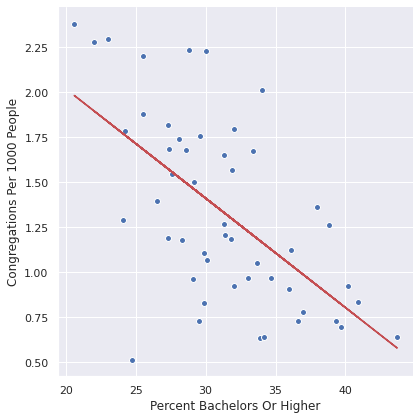

0.3702632850342211

In [83]:
# Plot the percentage of people who have a Bachelors or higher vs. number of congregations per 1000 people, each state's color is based on their religious adherence level (high, middle, low)

import seaborn as sns
  
hue = "Religious Adherence Level"
x = 'Percent Bachelors Or Higher'
y = 'Congregations Per 1000 People'

X = all_political_df[x].values[:,np.newaxis]
# target data is array of shape (n,) 
Y = all_political_df[y].values

model2 = LinearRegression()
model2.fit(X, Y)

g = sns.FacetGrid(all_political_df, height = 6)
sns.set(rc={'figure.figsize':(30, 30)})
g = g.map(plt.scatter, "Percent Bachelors Or Higher", "Congregations Per 1000 People", edgecolor="w")
plt.plot(X, model2.predict(X), color='r')
plt.show()

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

R^2 is 37%. R^2 is a goodness of fit measure for linear regression. This means that 37% of the variance in the percent bachelors or higher variable is explained by the congregations per 1000 people. If R^2 was 1, then that would mean 100% of the variance in the percent bachelors or higher variable is explained by the congregations per 1000 variable.

The slope of the linear regression is negative which indicates that there is a negative trend such that the higher percent of bachelors or higher achieved in a state, the less congregations there are in a state.

# Linear Regression #5 - Universities per 1000 People vs. Percent of Bachelors or Higher Achieved¶

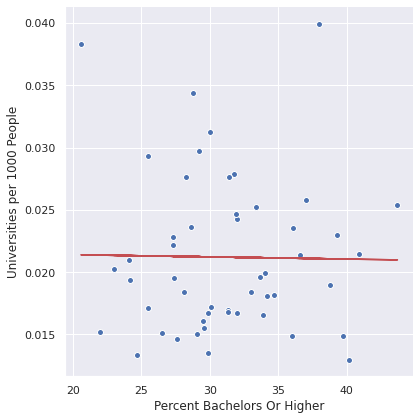

0.00021078329745594093

In [88]:
# Plot the percentage of people who have a Bachelors or higher vs. number of universities per 1000 people, each state's color is based on their religious adherence level (high, middle, low)

import seaborn as sns
  
hue = "Religious Adherence Level"
x = 'Percent Bachelors Or Higher'
y = 'Universities per 1000 People'

X = all_political_df[x].values[:,np.newaxis]
# target data is array of shape (n,) 
Y = all_political_df[y].values

model2 = LinearRegression()
model2.fit(X, Y)

g = sns.FacetGrid(all_political_df, height = 6)
sns.set(rc={'figure.figsize':(30, 30)})
g = g.map(plt.scatter, "Percent Bachelors Or Higher", "Universities per 1000 People", edgecolor="w")
plt.plot(X, model2.predict(X), color='r')
plt.show()

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

R^2 is 0.0002. R^2 is a goodness of fit measure for linear regression. This means that 0.02% of the variance in the percent bachelors or higher variable is explained by the number of universities per 1000 people. If R^2 was 1, then that would mean 100% of the variance in the percent bachelors or higher variable is explained by the number of universities per 1000 variable.

The slope of the linear regression is nearly flat which indicates that there is not a strong trend between percent of bachelors or higher achieved in a state and the number of universities per 1000 people in a state.

The number of congregations per 1000 people in a state has a stronger trend with the percent of bachelors degrees achieved by the people in a state. People didn't necessarily get their degree in the state that they currently reside in. But they probably go to a congregation near by if they do go to one. Looks like the more congregations per 1000 people in a state, there are less people with bachelors degrees or higher.

NameError: name 'all_df' is not defined

# Conclusions

1. What is the relationship between how many post-secondary education centers are in a state and how religious that state is?
- need to do a linear regression here

1. What is the relationship between political affiliation and post-secondary education achievement in a state?
  - 3 linear regressions
  - Percent of Democratic Leaning People vs. Percent of Bachelors or Higher Achieved, r^2 0.22, positive slope
  - Percent of Republican Leaning People vs. Percent of Bachelors or Higher Achieved, r^2 0.308, negative slope
  - Percent of No Leaning People vs. Percent of Bachelors or Higher Achieved, r^2 0.039, almost flat, but slight positive slope

1. What is the relationship between the number of congregations in a state and how many people have achieved a Bachelors degree or higher?
  - linear regression Congregations per 1000 People vs. Percent of Bachelors or Higher Achieved, r^2 0.37, negative slope


1. What is the relationship between the number of universities in a state and how many people have achieved a Bachelors degree or higher?
  - linear regression Universities per 1000 People vs. Percent of Bachelors or Higher Achieved, r^2 0.0002, flat


Models:
Without political data:
1. KNN - Religion is important, 50%
1. KNN - Religion adherence level, 10%
1. MNB - Religion adherence level, 46.15%
1. MNB - Religion is important, 53.85%

With political data:
1. KNN - Religion is important, 23%
1. KNN - Religion adherence level, 61.5%

With political data and encoding all the features into L, M, H categories:
1. KNN - Religion is important, 38.4%

Linear regressions:
1. Percent of Democratic Leaning People vs. Percent of Bachelors or Higher Achieved, r^2 0.22, positive slope
1. Percent of Republican Leaning People vs. Percent of Bachelors or Higher Achieved, r^2 0.308, negative slope
1. Percent of No Leaning People vs. Percent of Bachelors or Higher Achieved, r^2 0.039, almost flat, but slight positive slope
1. Congregations per 1000 People vs. Percent of Bachelors or Higher Achieved, r^2 0.37, negative slope
1. Universities per 1000 People vs. Percent of Bachelors or Higher Achieved, r^2 0.0002, flat


## Improvements and next steps
1. Data sets came from different sources and from different points in time with different sample sizes. Collecting data on the same people in a state with regards to their religious views, political affiliation, and education level would greatly improve the accuracy and any correlations between these factors.
1. Look into the relationship between percent relious vs. the number of congregations and vs. the number of universities and do a linear regression.